***Primer proyecto de simulación matemática***

# "APROXIMANDO USD/MXN CON PRECIOS ANTERIORES"

En este trabajo realizaremos  aproximaciones con base a 5, 30 y 90 días anteriores al precio USD/MXN del 20 de Septiembre. Se compararán y graficarán los resultados para determinar el impacto que tiene realizar una aproximación con un mayor número de datos. 

### Objetivo general
Realizar y comparar aproximaciones resueltas con algebra lineal, utilizando diferente número días anteriores al precio USD/MXN  seleccionado.
### Objetivos específicos
Calcular la aproximación con 5, 30 y 90 días.
Comparar el precio obtenido por la aproximación con el precio real (20 Septiembre).
Graficar los resultados obtenidos de las aproximaciones.
Graficar el error de las aproximaciones contra el precio real.
Determinar cual fue la aproximación más acertada y por qué.
Ver si podemos resolver el problema con algebra lineal.

Nuestra función será
$𝑏=𝐴𝑥$
A es la matriz nombrada de valores de ingreso y b es el resultado. 
Entonces, se despeja x para conseguir el vector con el cual se harán aproximaciones posteriormente. 
$𝑋=𝐴^{−1} 𝑏$
Es una serie de tiempo representada por una matriz.
Algunas de las limitaciones es que no tenemos tantos datos como queremos, hay factores externos que modifican el precio y no tenemos conocimientos de aconteciomientos políticos.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
def datos(archivo, columnas):
    file = pd.read_csv(archivo) #se importa el archivo.
    n = len(file['Fecha']) #se calcula la longitud de los datos. 
    cierre = file['Cierre'].values
    en_blanco = np.zeros((n-columnas,columnas)) #se crea un array en blanco de dimensiones(n-columna * colummna)
    for k in np.arange(columnas): 
        en_blanco[:,k] = cierre[k:n-columnas+k] #se rellenan los datos vacíos con los originales.
    return(en_blanco, cierre)

In [3]:
archivo = 'USD_MXN.csv'    
data, linear = datos(archivo, 31)
data

array([[18.819 , 18.776 , 18.8068, ..., 18.8936, 18.8935, 18.982 ],
       [18.776 , 18.8068, 18.838 , ..., 18.8935, 18.982 , 19.1373],
       [18.8068, 18.838 , 18.895 , ..., 18.982 , 19.1373, 18.8826],
       ...,
       [11.8145, 11.235 , 11.2   , ..., 10.145 , 10.1625, 10.135 ],
       [11.235 , 11.2   , 10.96  , ..., 10.1625, 10.135 , 10.145 ],
       [11.2   , 10.96  , 10.92  , ..., 10.135 , 10.145 , 10.095 ]])

In [4]:
b = data[:,0]
A = data[:,1:]
A, b

(array([[18.776 , 18.8068, 18.838 , ..., 18.8936, 18.8935, 18.982 ],
        [18.8068, 18.838 , 18.895 , ..., 18.8935, 18.982 , 19.1373],
        [18.838 , 18.895 , 18.8882, ..., 18.982 , 19.1373, 18.8826],
        ...,
        [11.235 , 11.2   , 10.96  , ..., 10.145 , 10.1625, 10.135 ],
        [11.2   , 10.96  , 10.92  , ..., 10.1625, 10.135 , 10.145 ],
        [10.96  , 10.92  , 11.04  , ..., 10.135 , 10.145 , 10.095 ]]),
 array([18.819 , 18.776 , 18.8068, ..., 11.8145, 11.235 , 11.2   ]))

Se toma por supuesto que el precio de un día será dado por el precio de 30 días anteriores. Se tiene el resultado algebráico: $$Ax = b$$ dónde A es la matriz nombrada de valores de ingreso y b es el resultado. 
se despeja x para conseguir el vector con el cual se harán aproximaciones posteriormente. 
$$x = A^{-1}b$$

In [5]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 9.73588406e-01, -4.95386517e-04, -1.34215421e-03,  1.20240964e-02,
        -4.12632310e-02,  1.26364132e-01, -8.49968250e-02,  7.33702673e-02,
        -4.86844621e-02,  9.92309388e-03,  3.44808057e-03, -3.57375544e-02,
         4.93039900e-03, -1.37626974e-02,  4.23376656e-02, -2.60167939e-02,
        -1.29787848e-02, -2.95980351e-02,  5.81861925e-02,  7.88262352e-03,
         4.87429776e-03, -4.12241544e-02,  1.25482087e-02,  4.32104616e-02,
        -7.13789923e-02,  1.50409753e-02,  6.48299094e-02, -8.47440052e-02,
         4.93332937e-02, -9.49262862e-03]), 30)

Ahora que se tiene el vector X ingresamos los últimos 30 datos y los evalúamos con el vector para conseguir una aproximación de la nueva cotización. 

In [6]:
pred = linear[0:30]

En la variable pred almacenamos los últimos 30 datos obtenidos de las cotizaciones del dolar-peso y la multiplicamos vectorialmente por la variable x. El resultado deberá ser un número cercano al precio nuevo.

In [7]:
pred.dot(x)

18.816193614698225

Como valor nos arroja que el precio del día 20 de septiembre deberá ser cercano a   **18.816193** .  Después de consultar el precio de cierre del día 20 de septiembre confirmamos que es de:   **18.7972**   Obteniendo un error de   **0.1%**   en la predicción del nuevo precio. 

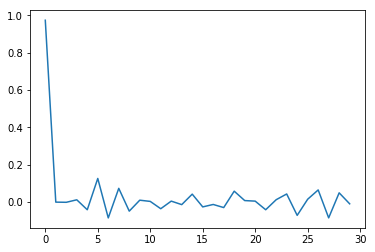

In [8]:
plt.plot(x)

In [9]:
x

array([ 9.73588406e-01, -4.95386517e-04, -1.34215421e-03,  1.20240964e-02,
       -4.12632310e-02,  1.26364132e-01, -8.49968250e-02,  7.33702673e-02,
       -4.86844621e-02,  9.92309388e-03,  3.44808057e-03, -3.57375544e-02,
        4.93039900e-03, -1.37626974e-02,  4.23376656e-02, -2.60167939e-02,
       -1.29787848e-02, -2.95980351e-02,  5.81861925e-02,  7.88262352e-03,
        4.87429776e-03, -4.12241544e-02,  1.25482087e-02,  4.32104616e-02,
       -7.13789923e-02,  1.50409753e-02,  6.48299094e-02, -8.47440052e-02,
        4.93332937e-02, -9.49262862e-03])

In [11]:
archivo = 'USD_MXN.csv'    
data, linear = datos(archivo, 6)
data

array([[18.819 , 18.776 , 18.8068, 18.838 , 18.895 , 18.8882],
       [18.776 , 18.8068, 18.838 , 18.895 , 18.8882, 18.8335],
       [18.8068, 18.838 , 18.895 , 18.8882, 18.8335, 19.0177],
       ...,
       [10.3365, 10.285 , 10.235 , 10.145 , 10.1625, 10.135 ],
       [10.285 , 10.235 , 10.145 , 10.1625, 10.135 , 10.145 ],
       [10.235 , 10.145 , 10.1625, 10.135 , 10.145 , 10.095 ]])

In [12]:
b = data[:,0]
A = data[:,1:]
A, b

(array([[18.776 , 18.8068, 18.838 , 18.895 , 18.8882],
        [18.8068, 18.838 , 18.895 , 18.8882, 18.8335],
        [18.838 , 18.895 , 18.8882, 18.8335, 19.0177],
        ...,
        [10.285 , 10.235 , 10.145 , 10.1625, 10.135 ],
        [10.235 , 10.145 , 10.1625, 10.135 , 10.145 ],
        [10.145 , 10.1625, 10.135 , 10.145 , 10.095 ]]),
 array([18.819 , 18.776 , 18.8068, ..., 10.3365, 10.285 , 10.235 ]))

In [13]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 0.96478304,  0.01054616, -0.00331316,  0.01196263,  0.01621708]), 5)

In [16]:
pred = linear[0:5]

In [17]:
pred.dot(x)

18.82373064683572

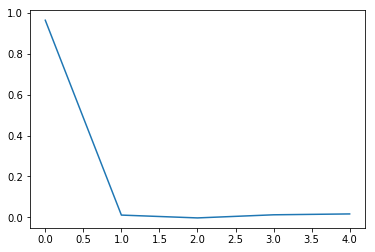

In [18]:
plt.plot(x)

Por lo tanto la aproximácion del precio tomando solamente los ultimos 5 días es peor ya que fue más inexacta. No refleja la tendencia en la variación del precio.

In [18]:
data, linear = datos(archivo, 91)
data

array([[18.819 , 18.776 , 18.8068, ..., 20.34  , 20.2895, 20.4785],
       [18.776 , 18.8068, 18.838 , ..., 20.2895, 20.4785, 20.3012],
       [18.8068, 18.838 , 18.895 , ..., 20.4785, 20.3012, 20.4605],
       ...,
       [13.7055, 13.4295, 13.3   , ..., 10.145 , 10.1625, 10.135 ],
       [13.4295, 13.3   , 13.2945, ..., 10.1625, 10.135 , 10.145 ],
       [13.3   , 13.2945, 13.3195, ..., 10.135 , 10.145 , 10.095 ]])

In [19]:
b = data[:,0]
A = data[:,1:]
A, b

(array([[18.776 , 18.8068, 18.838 , ..., 20.34  , 20.2895, 20.4785],
        [18.8068, 18.838 , 18.895 , ..., 20.2895, 20.4785, 20.3012],
        [18.838 , 18.895 , 18.8882, ..., 20.4785, 20.3012, 20.4605],
        ...,
        [13.4295, 13.3   , 13.2945, ..., 10.145 , 10.1625, 10.135 ],
        [13.3   , 13.2945, 13.3195, ..., 10.1625, 10.135 , 10.145 ],
        [13.2945, 13.3195, 13.1825, ..., 10.135 , 10.145 , 10.095 ]]),
 array([18.819 , 18.776 , 18.8068, ..., 13.7055, 13.4295, 13.3   ]))

In [20]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 9.77044868e-01,  3.34933292e-02, -6.73466733e-02,  2.95792596e-02,
        -3.16707853e-02,  1.46140884e-01, -1.00106035e-01,  4.52858781e-02,
        -2.58151572e-02,  2.93425564e-02, -3.12420843e-02, -2.94861927e-02,
         2.15152189e-02, -1.14368346e-02,  5.75091857e-02, -8.17545074e-02,
         3.84058432e-02, -1.86211593e-02,  2.43775536e-02,  2.13702225e-04,
         1.17959600e-02, -3.48438272e-02,  4.18491003e-03,  5.79842652e-02,
        -7.73761311e-02, -5.32696390e-03,  7.99809619e-02, -6.31284730e-02,
         1.18455626e-02,  1.41376444e-02, -2.00829616e-02, -3.37186711e-02,
         2.17052643e-02,  2.13201362e-02,  1.82676779e-02, -4.22730566e-02,
         5.34692766e-02,  1.10645239e-02, -8.82968475e-03,  3.98567776e-02,
        -7.30384982e-02,  1.48646143e-02,  1.24801759e-02, -1.66246205e-03,
         5.19610754e-03, -9.01749026e-02,  3.66261325e-02,  4.28528151e-02,
        -3.22112862e-02,  5.52931731e-03,  2.21561165e-02, -5.07864888e-02,
         5.1

In [21]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 9.77044868e-01,  3.34933292e-02, -6.73466733e-02,  2.95792596e-02,
        -3.16707853e-02,  1.46140884e-01, -1.00106035e-01,  4.52858781e-02,
        -2.58151572e-02,  2.93425564e-02, -3.12420843e-02, -2.94861927e-02,
         2.15152189e-02, -1.14368346e-02,  5.75091857e-02, -8.17545074e-02,
         3.84058432e-02, -1.86211593e-02,  2.43775536e-02,  2.13702225e-04,
         1.17959600e-02, -3.48438272e-02,  4.18491003e-03,  5.79842652e-02,
        -7.73761311e-02, -5.32696390e-03,  7.99809619e-02, -6.31284730e-02,
         1.18455626e-02,  1.41376444e-02, -2.00829616e-02, -3.37186711e-02,
         2.17052643e-02,  2.13201362e-02,  1.82676779e-02, -4.22730566e-02,
         5.34692766e-02,  1.10645239e-02, -8.82968475e-03,  3.98567776e-02,
        -7.30384982e-02,  1.48646143e-02,  1.24801759e-02, -1.66246205e-03,
         5.19610754e-03, -9.01749026e-02,  3.66261325e-02,  4.28528151e-02,
        -3.22112862e-02,  5.52931731e-03,  2.21561165e-02, -5.07864888e-02,
         5.1

In [24]:
pred = linear[0:90]

In [25]:
pred.dot(x)

18.832999198719033

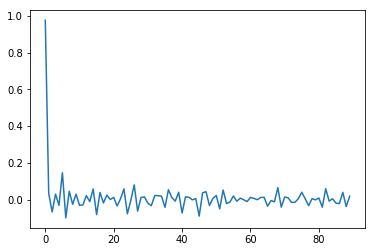

In [26]:
plt.plot(x)

In [27]:
data, linear = datos(archivo, 361)
data

array([[18.819 , 18.776 , 18.8068, ..., 18.6212, 18.7083, 18.4772],
       [18.776 , 18.8068, 18.838 , ..., 18.7083, 18.4772, 18.518 ],
       [18.8068, 18.838 , 18.895 , ..., 18.4772, 18.518 , 18.506 ],
       ...,
       [12.733 , 12.7007, 12.7948, ..., 10.145 , 10.1625, 10.135 ],
       [12.7007, 12.7948, 12.7363, ..., 10.1625, 10.135 , 10.145 ],
       [12.7948, 12.7363, 12.8169, ..., 10.135 , 10.145 , 10.095 ]])

In [28]:
b = data[:,0]
A = data[:,1:]
A, b

(array([[18.776 , 18.8068, 18.838 , ..., 18.6212, 18.7083, 18.4772],
        [18.8068, 18.838 , 18.895 , ..., 18.7083, 18.4772, 18.518 ],
        [18.838 , 18.895 , 18.8882, ..., 18.4772, 18.518 , 18.506 ],
        ...,
        [12.7007, 12.7948, 12.7363, ..., 10.145 , 10.1625, 10.135 ],
        [12.7948, 12.7363, 12.8169, ..., 10.1625, 10.135 , 10.145 ],
        [12.7363, 12.8169, 12.8795, ..., 10.135 , 10.145 , 10.095 ]]),
 array([18.819 , 18.776 , 18.8068, ..., 12.733 , 12.7007, 12.7948]))

In [29]:
x = np.linalg.pinv(A).dot(b)
x, len(x)

(array([ 9.73250046e-01,  1.03722120e-02, -3.56876519e-02,  2.16044720e-02,
        -1.13517528e-02,  1.30659700e-01, -8.81291591e-02,  3.58019558e-02,
        -2.85577970e-02,  3.08972845e-02, -2.68150600e-02, -3.04214256e-02,
         2.86050002e-02, -1.82852422e-02,  4.43793371e-02, -7.08052328e-02,
         2.61883829e-02, -1.39268482e-02,  1.33365402e-02,  1.65080918e-02,
         1.11635763e-03, -5.18218381e-02,  2.39498053e-02,  6.67731154e-02,
        -6.07427633e-02, -2.29039755e-02,  8.18189913e-02, -6.26303575e-02,
         2.84860746e-02, -1.38581443e-02, -2.07821029e-03, -5.14876213e-02,
         4.67469421e-02,  7.48922471e-03,  9.34623295e-03, -4.29664258e-02,
         6.31823772e-02, -5.27039292e-03, -3.80985444e-03,  3.19840486e-02,
        -5.86526855e-02,  2.90240611e-02,  1.71438766e-02, -2.12528615e-02,
         8.65591687e-03, -7.95818638e-02,  3.83371584e-02,  4.27704801e-02,
        -7.63278069e-02,  5.01389514e-02,  3.51136018e-03, -7.01159171e-02,
         7.6

In [31]:
pred = linear[0:360]

In [32]:
pred.dot(x)

18.913880381187834

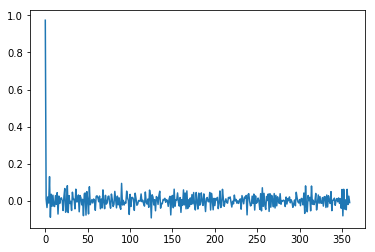

In [33]:
plt.plot(x)

## Conclusión

Observamos que entre más datos utilices más se le da importancia al primer dato entonces los demás datos los toma como ruido.

Este modelo de aproximación resulta ser ‘bueno’ en variación porcentual, sin embargo resulta ser también muy trivial. Los resultados que arroja son mayormente dados por el día anterior y un poco de variación basado en los acontecimientos anteriores. 

Se necesitará otro modelo de aproximaciones para posibles especulaciones.
El algebra lineal tiene buenas aplicaciones en el ámbito financiero, no obstante, las cotizaciones USD-MXN no son lineales. 